In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")
testing = testing[["Factor A", "Factor D", "Factor F", "Factor G", "Factor H"]]
test = testing.to_numpy()
one = train["TGD Consultancy Share price"]
two = train["TGD Automobiles Share price"]
three = train["TGD Power Share price"]
train = train[["dates", "Factor A", "Factor D", "Factor F", "Factor G", "Factor H", "TGD Consultancy Share price", "TGD Automobiles Share price", "TGD Power Share price"]]
display(train)
print(test)

features = train.drop(columns = ["dates", "TGD Consultancy Share price", "TGD Automobiles Share price", "TGD Power Share price"], axis = 1).to_numpy()

target = train[["TGD Consultancy Share price", "TGD Automobiles Share price", "TGD Power Share price"]]
target = target.to_numpy()
print(target)
consul = target[:, 0]
auto = target[:, 1]
power = target[:, 2]
print(features)

,dates,Factor A,Factor D,Factor F,Factor G,Factor H,TGD Consultancy Share price,TGD Automobiles Share price,TGD Power Share price
0,1700-01-01,502.52,947.6,79050.0,502.10,502.73,519.0,420.0,507.0
1,1700-01-02,503.33,928.6,31082.0,502.28,501.96,518.0,420.0,507.0
2,1700-01-03,500.62,935.5,19375.0,502.09,499.17,523.0,437.0,522.0
3,1700-01-04,502.08,923.5,22010.0,501.88,500.43,522.0,437.0,522.0
4,1700-01-05,502.81,918.1,26533.0,501.70,501.46,522.0,437.0,522.0
...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,100499.9,10000500.0,599.99,1499.99,498.0,420.0,507.0
161764,2142-11-24,10499.99,100499.9,10000500.0,599.99,1499.99,502.0,420.0,507.0
161765,2142-11-25,10499.99,100499.9,10000500.0,599.99,1499.99,508.0,420.0,507.0
161766,2142-11-26,10499.99,100499.9,10000500.0,599.99,1499.99,507.0,420.0,507.0


[[1.049999e+04 1.004999e+05 1.000050e+07 5.999900e+02 1.499990e+03]
 [1.049999e+04 1.004999e+05 1.000050e+07 5.999900e+02 1.499990e+03]
 [1.049999e+04 1.004999e+05 1.000050e+07 5.999900e+02 1.499990e+03]
 ...
 [5.018400e+02 9.039000e+02 1.939730e+05 5.012700e+02 4.974600e+02]
 [4.964000e+02 9.290000e+02 1.675640e+05 5.011600e+02 4.995700e+02]
 [4.969400e+02 8.957000e+02 1.599330e+05 5.012500e+02 5.010300e+02]]
[[519. 420. 507.]
 [518. 420. 507.]
 [523. 437. 522.]
 ...
 [508. 420. 507.]
 [507. 420. 507.]
 [499. 420. 507.]]
[[5.025200e+02 9.476000e+02 7.905000e+04 5.021000e+02 5.027300e+02]
 [5.033300e+02 9.286000e+02 3.108200e+04 5.022800e+02 5.019600e+02]
 [5.006200e+02 9.355000e+02 1.937500e+04 5.020900e+02 4.991700e+02]
 ...
 [1.049999e+04 1.004999e+05 1.000050e+07 5.999900e+02 1.499990e+03]
 [1.049999e+04 1.004999e+05 1.000050e+07 5.999900e+02 1.499990e+03]
 [1.049999e+04 1.004999e+05 1.000050e+07 5.999900e+02 1.499990e+03]]


In [ ]:
logModel = LogisticRegression(solver = "lbfgs", max_iter = 100)
logModel.fit(features[:-1000], consul[:-1000])
y_model = logModel.predict(features[-1000:])
print(mean_squared_error(y_model, consul[-1000:])**0.5)

8.696781013685467


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logModel = LogisticRegression(solver = "lbfgs", max_iter = 100)
logModel.fit(features, power)
y_model = logModel.predict(test)
print(y_model)

[503. 503. 503. ... 503. 503. 503.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
c = y_model[y_model == 503]
len(c)

30000

In [ ]:
logModel.fit(features, auto)
y_model1 = logModel.predict(test)
print(y_model1)

[407. 407. 407. ... 407. 407. 407.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
c = y_model1[y_model1 == 407]
len(c)

30000

In [ ]:
c = y_model[y_model == 508]
len(c)

26367

In [ ]:
logModel = LogisticRegression(solver = "lbfgs", max_iter = 300)
logModel.fit(features, power)
y_model1 = logModel.predict(test)
print(y_model1)

[503. 503. 503. ... 503. 503. 503.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logModel.fit(features, auto)
y_model2 = logModel.predict(test)
print(y_model2)

[407. 407. 407. ... 407. 407. 407.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
logModel.fit(features, consul)
y_model3 = logModel.predict(test)
print(y_model3)

[507. 507. 507. ... 507. 507. 507.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
xmodel = xgb.XGBRegressor()
xmodel.fit(features, auto)
y_model2 = xmodel.predict(test)
print(y_model2)

[417.98288 417.98288 417.98288 ... 420.5201  416.39923 416.4249 ]


In [ ]:
import xgboost as xgb
import optuna
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(features[:-1000], auto[:-1000])

    # Make predictions
    y_pred = optuna_model.predict(features[-1000:])

    # Evaluate predictions
    accuracy = mean_squared_error(auto[-1000:], y_pred)**0.5
    return accuracy

In [ ]:
study = optuna.create_study(direction = "minimize")

[I 2023-04-16 02:42:11,976] A new study created in memory with name: no-name-2b8ff384-c8ef-4406-a0d8-59a78270bdd7


In [ ]:
study.optimize(objective, n_trials=100)

[I 2023-04-16 02:42:18,438] Trial 0 finished with value: 11.267582439844356 and parameters: {'max_depth': 3, 'learning_rate': 0.013458669638579304, 'n_estimators': 273, 'min_child_weight': 5, 'gamma': 0.00377671183131739, 'subsample': 0.03741394450334979, 'colsample_bytree': 0.33726036929735553, 'reg_alpha': 4.668739711897681e-05, 'reg_lambda': 1.5238507832661963e-07}. Best is trial 0 with value: 11.267582439844356.
[I 2023-04-16 02:42:20,937] Trial 1 finished with value: 11.319138328465735 and parameters: {'max_depth': 5, 'learning_rate': 0.9039185492900466, 'n_estimators': 101, 'min_child_weight': 6, 'gamma': 0.01262842743045886, 'subsample': 0.16717757946024772, 'colsample_bytree': 0.030681401256252547, 'reg_alpha': 0.0005214474749087132, 'reg_lambda': 3.975047593466817e-08}. Best is trial 0 with value: 11.267582439844356.
[I 2023-04-16 02:42:26,723] Trial 2 finished with value: 10.776556296233402 and parameters: {'max_depth': 1, 'learning_rate': 0.014762076425806342, 'n_estimators'

In [ ]:
best = study.best_trial
newXGModel = xgb.XGBRegressor(**best.params)
newXGModel.fit(features, auto)
y_model2 = newXGModel.predict(test)
print(y_model2)

[413.8293  413.8293  413.8293  ... 412.87274 413.24585 413.04507]


In [ ]:
best.value

9.769342473120386

In [ ]:
xmodel.fit(features, consul)
y_model1 = xmodel.predict(test)
print(y_model1)

[511.3286  511.3286  511.3286  ... 510.11127 510.18008 509.98083]


In [ ]:
xmodel.fit(features, power)
y_model3 = xmodel.predict(test)
print(y_model3)

[510.00092 510.00092 510.00092 ... 509.95938 510.4253  509.69556]


In [ ]:
print(y_model3.max(), y_model3.min())

508.0 504.0


In [ ]:
t2new = []
for x in y_model3:
  t = round(x)
  if t == 504:
    t2new.append(413.927)
  if t == 505:
    t2new.append(416.451)
  if t == 506:
    t2new.append(418.477)
  if t == 507:
    t2new.append(420.208)
  if t == 508:
    t2new.append(421.74)
print(len(t2new))

30000


In [ ]:
print(y_model2.max(), y_model2.min(), y_model2.mean())

418.1437 410.8961 412.88123


In [ ]:
predict = y_model3 + y_model1 + np.array([412.88123]*30000)
ans = pd.DataFrame({"id" : testing.index, "predicted" : predict})
display(ans)
ans.to_csv("submission12.csv", index = None)

,id,predicted
0,0,1422.88123
1,1,1422.88123
2,2,1422.88123
3,3,1422.88123
4,4,1422.88123
...,...,...
29995,29995,1422.88123
29996,29996,1422.88123
29997,29997,1422.88123
29998,29998,1422.88123


In [ ]:
print(y_model3.max(), y_model3.min())

508.0 504.0


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 93.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826048 sha256=3f993136e7177e2bdb06efb92b6585cee24222e27a7c6cb830336d1df6eb0baa
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.6.0
    Uninstalling pystan-3.6.0:
      Successfully uninstalled pystan-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437742 sha256=1f959fc355c4d89b2432e03fbede41d09d0700dec61c40cbe

In [ ]:
from fbprophet import Prophet

In [ ]:
fbtrain = pd.read_csv("train.csv")
consul = fbtrain[["dates", "TGD Consultancy Share price"]]
consul = consul.rename(columns = {"dates" : "ds", "TGD Consultancy Share price" : "y"})
consul

,ds,y
0,1700-01-01,519.0
1,1700-01-02,518.0
2,1700-01-03,523.0
3,1700-01-04,522.0
4,1700-01-05,522.0
...,...,...
161763,2142-11-23,498.0
161764,2142-11-24,502.0
161765,2142-11-25,508.0
161766,2142-11-26,507.0


In [ ]:
consul["ds"] = pd.to_datetime(consul["ds"])

In [ ]:
dates = pd.Series(np.array([0]*len(consul["y"])))
print(dates)

0         0
1         0
2         0
3         0
4         0
         ..
161763    0
161764    0
161765    0
161766    0
161767    0
Length: 161768, dtype: int64


In [ ]:
for i in range(len(consul["y"])):
  dates[i] = consul.iloc[:,0][i].to_pydatetime()

In [ ]:
consulTrain = pd.DataFrame({"ds" : dates, "y" : consul.iloc[:,1]})
consulTrain.iloc[:,0][0]

datetime.datetime(1700, 1, 1, 0, 0)

In [ ]:
fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(consulTrain[:10000])

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
y = fbmodel.predict(consulTrain[10000:20000])
y

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1727-05-20,530.359669,494.899015,563.764868,530.359669,530.359669,0.254353,0.254353,0.254353,0.544982,...,0.100857,0.100857,0.100857,-0.391486,-0.391486,-0.391486,0.0,0.0,0.0,530.614022
1,1727-05-21,530.370044,497.274941,566.975428,530.370044,530.370044,0.437663,0.437663,0.437663,0.544982,...,0.243234,0.243234,0.243234,-0.350553,-0.350553,-0.350553,0.0,0.0,0.0,530.807707
2,1727-05-22,530.380419,494.631017,565.020871,530.380419,530.380419,0.015522,0.015522,0.015522,0.544982,...,-0.176453,-0.176453,-0.176453,-0.353007,-0.353007,-0.353007,0.0,0.0,0.0,530.395941
3,1727-05-23,530.390794,493.554581,564.128199,530.390794,530.390794,-0.137440,-0.137440,-0.137440,0.544982,...,-0.287223,-0.287223,-0.287223,-0.395200,-0.395200,-0.395200,0.0,0.0,0.0,530.253354
4,1727-05-24,530.401169,495.383901,566.948982,530.401169,530.401169,-0.050338,-0.050338,-0.050338,0.544982,...,-0.122767,-0.122767,-0.122767,-0.472554,-0.472554,-0.472554,0.0,0.0,0.0,530.350831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1754-09-30,634.058707,-1146.711231,2530.244248,-1130.770594,2523.317786,1.015316,1.015316,1.015316,0.544982,...,0.264504,0.264504,0.264504,0.205830,0.205830,0.205830,0.0,0.0,0.0,635.074023
9996,1754-10-01,634.069082,-1134.440967,2508.602310,-1131.068097,2523.602182,0.903108,0.903108,0.903108,0.544982,...,0.100857,0.100857,0.100857,0.257269,0.257269,0.257269,0.0,0.0,0.0,634.972190
9997,1754-10-02,634.079457,-1110.850792,2504.545758,-1131.365600,2523.886578,1.095479,1.095479,1.095479,0.544982,...,0.243234,0.243234,0.243234,0.307263,0.307263,0.307263,0.0,0.0,0.0,635.174936
9998,1754-10-03,634.089832,-1143.342896,2531.978448,-1131.663104,2524.170974,0.723732,0.723732,0.723732,0.544982,...,-0.176453,-0.176453,-0.176453,0.355203,0.355203,0.355203,0.0,0.0,0.0,634.813565


In [ ]:
fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(consulTrain[:-90000])

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
y1 = fbmodel.predict(consulTrain[-90000:-80000])

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
y1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1896-06-30,509.694563,477.530625,537.643929,509.694563,509.694563,-0.910199,-0.910199,-0.910199,-1.202537,...,0.014408,0.014408,0.014408,0.277930,0.277930,0.277930,0.0,0.0,0.0,508.784364
1,1896-07-01,509.694488,478.280850,536.702796,509.694488,509.694488,-0.833869,-0.833869,-0.833869,-1.202537,...,0.047300,0.047300,0.047300,0.321368,0.321368,0.321368,0.0,0.0,0.0,508.860619
2,1896-07-02,509.694413,479.678629,538.338749,509.694413,509.694413,-0.845789,-0.845789,-0.845789,-1.202537,...,-0.007965,-0.007965,-0.007965,0.364712,0.364712,0.364712,0.0,0.0,0.0,508.848624
3,1896-07-03,509.694338,481.565640,540.847221,509.694338,509.694338,-0.848265,-0.848265,-0.848265,-1.202537,...,-0.052292,-0.052292,-0.052292,0.406563,0.406563,0.406563,0.0,0.0,0.0,508.846072
4,1896-07-04,509.694263,478.564096,537.095001,509.694263,509.694263,-0.802243,-0.802243,-0.802243,-1.202537,...,-0.045336,-0.045336,-0.045336,0.445629,0.445629,0.445629,0.0,0.0,0.0,508.892019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1923-11-12,508.944203,461.081874,556.563406,473.104046,547.172836,-0.889060,-0.889060,-0.889060,-1.202537,...,0.077000,0.077000,0.077000,0.236477,0.236477,0.236477,0.0,0.0,0.0,508.055143
9996,1923-11-13,508.944128,461.671642,557.509435,473.100623,547.178711,-1.006450,-1.006450,-1.006450,-1.202537,...,0.014408,0.014408,0.014408,0.181680,0.181680,0.181680,0.0,0.0,0.0,507.937679
9997,1923-11-14,508.944053,461.711157,556.686983,473.097200,547.184586,-1.017117,-1.017117,-1.017117,-1.202537,...,0.047300,0.047300,0.047300,0.138119,0.138119,0.138119,0.0,0.0,0.0,507.926936
9998,1923-11-15,508.943978,460.225666,557.193165,473.093778,547.190461,-1.103655,-1.103655,-1.103655,-1.202537,...,-0.007965,-0.007965,-0.007965,0.106847,0.106847,0.106847,0.0,0.0,0.0,507.840323


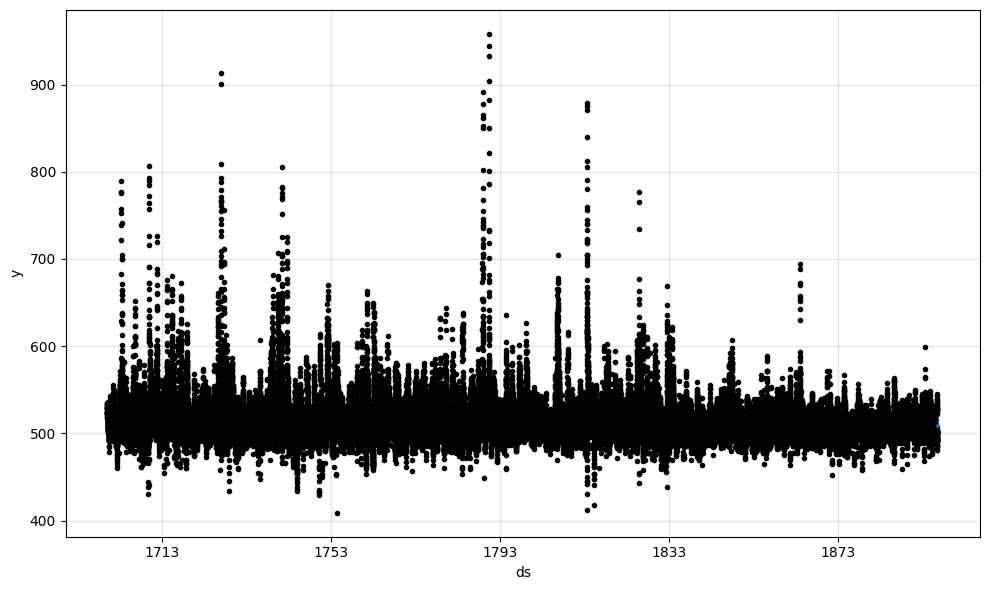

In [ ]:
fig = fbmodel.plot(y1[:100])

In [ ]:
t = y1.iloc[:,-1]
s = consul.iloc[:, 1][-90000:-80000]
s.index = list(range(0,10000))
print(s)
print(t)
print((t - s).var()**0.5)

0       531.0
1       528.0
2       516.0
3       514.0
4       517.0
        ...  
9995    504.0
9996    498.0
9997    494.0
9998    490.0
9999    494.0
Name: y, Length: 10000, dtype: float64
0       508.784364
1       508.860619
2       508.848624
3       508.846072
4       508.892019
           ...    
9995    508.055143
9996    507.937679
9997    507.926936
9998    507.840323
9999    507.777690
Name: yhat, Length: 10000, dtype: float64
8.85332172562104


In [ ]:
fbtrain = pd.read_csv("train.csv")
power = fbtrain[["dates", "TGD Power Share price"]]
power = power.rename(columns = {"dates" : "ds", "TGD Power Share price" : "y"})
power

,ds,y
0,1700-01-01,507.0
1,1700-01-02,507.0
2,1700-01-03,522.0
3,1700-01-04,522.0
4,1700-01-05,522.0
...,...,...
161763,2142-11-23,507.0
161764,2142-11-24,507.0
161765,2142-11-25,507.0
161766,2142-11-26,507.0


In [ ]:
power["ds"] = pd.to_datetime(power["ds"])
dates = pd.Series(np.array([0]*len(power["y"])))
for i in range(len(power["y"])):
  dates[i] = power.iloc[:,0][i].to_pydatetime()
powerTrain = pd.DataFrame({"ds" : dates, "y" : power.iloc[:,1]})

fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(powerTrain[:10000])
yn = fbmodel.predict(powerTrain[10000:20000])

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
t = yn.iloc[:,-1]
s = power.iloc[:, 1][10000:20000]
s.index = list(range(0,10000))
print(s)
print(t)
print((t - s).var()**0.5)

0       515.0
1       507.0
2       507.0
3       507.0
4       507.0
        ...  
9995    509.0
9996    509.0
9997    507.0
9998    507.0
9999    507.0
Name: y, Length: 10000, dtype: float64
0       525.723992
1       525.155600
2       525.185394
3       525.071652
4       524.961842
           ...    
9995    638.320768
9996    638.633664
9997    638.406352
9998    638.778707
9999    638.999208
Name: yhat, Length: 10000, dtype: float64
38.39606303230277


In [ ]:
fbtrain = pd.read_csv("train.csv")
auto = fbtrain[["dates", "TGD Automobiles Share price"]]
auto = auto.rename(columns = {"dates" : "ds", "TGD Automobiles Share price" : "y"})
auto


auto["ds"] = pd.to_datetime(auto["ds"])
dates = pd.Series(np.array([0]*len(auto["y"])))
for i in range(len(auto["y"])):
  dates[i] = auto.iloc[:,0][i].to_pydatetime()
autoTrain = pd.DataFrame({"ds" : dates, "y" : auto.iloc[:,1]})

fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(autoTrain[:-90000])
yn = fbmodel.predict(autoTrain[-90000:-80000])

t = yn.iloc[:,-1]
s = auto.iloc[:, 1][-90000:-80000]
s.index = list(range(0,10000))
print(s)
print(t)
print((t - s).var()**0.5)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


0       437.0
1       437.0
2       437.0
3       437.0
4       437.0
        ...  
9995    407.0
9996    420.0
9997    420.0
9998    420.0
9999    410.0
Name: y, Length: 10000, dtype: float64
0       416.351000
1       416.329877
2       416.323421
3       416.342775
4       416.241377
           ...    
9995    418.012429
9996    418.023112
9997    418.011114
9998    418.032867
9999    418.098591
Name: yhat, Length: 10000, dtype: float64
10.015499803767646


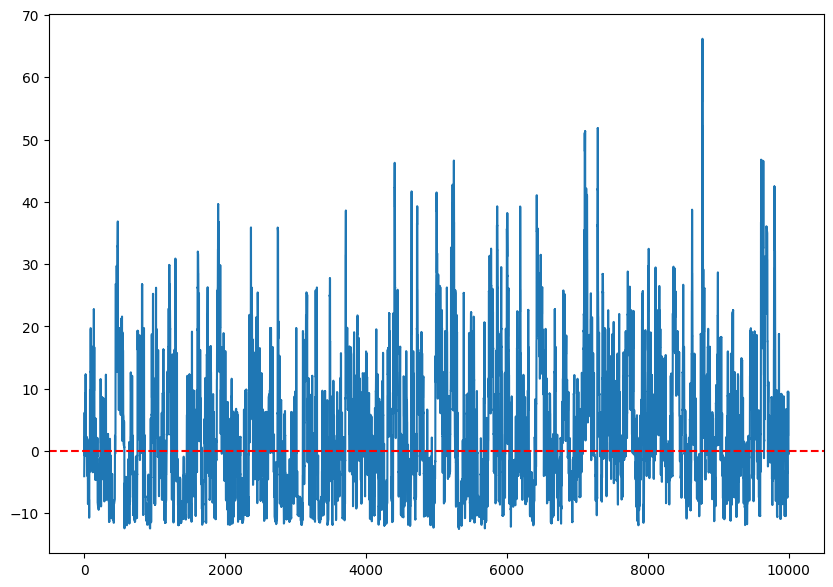

In [ ]:
plt.figure(figsize = (10, 7))
plt.plot(s - t)
plt.axhline(y = 0, linestyle = "--", color = "red")
plt.show()

[]

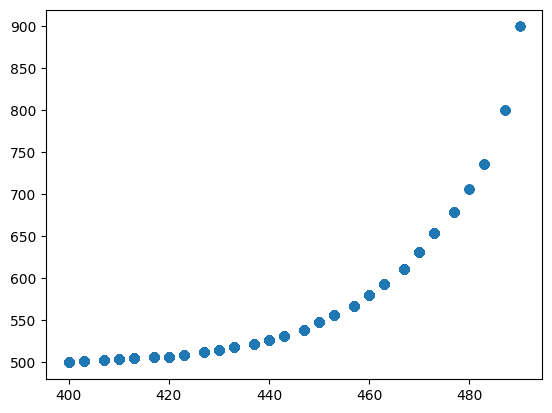

In [ ]:
plt.scatter(fbtrain.iloc[:, -2], fbtrain.iloc[:, -1])
plt.plot()

In [ ]:
newer = pd.read_csv("train.csv")
linModel = LinearRegression(fit_intercept = True)
linModel.fit(newer.iloc[:, -2][:, np.newaxis], np.log(newer.iloc[:, -1] - 435.95))

<ipython-input-141-4db582a680c3>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  linModel.fit(newer.iloc[:, -2][:, np.newaxis], np.log(newer.iloc[:, -1] - 435.95))


LinearRegression()

In [ ]:
linModel.coef_

array([0.01025059])

In [ ]:
linModel.intercept_

0.015511402360821158

In [ ]:
x = np.linspace(400, 500, 1000)
y = (1.5095465806315260*10**-10)*x**6 + (-2.4287156391805662*(10**-7))*x**5 + (1.0676216248580014*(10**-4))*x**4 + (2.5488123587843678*(10**-2))*x**3 + (-3.5609202757077149*(10**1))*x**2 + (1.0734896229625238*(10**4))*x + (-1.0916407366853179*(10**6))


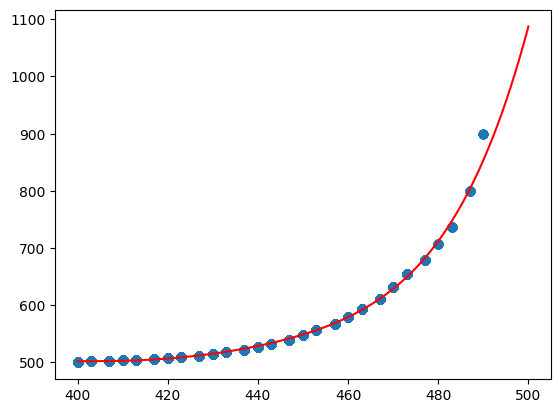

In [ ]:
plt.scatter(fbtrain.iloc[:, -2], fbtrain.iloc[:, -1])
plt.plot(x, y, color = "red")
plt.show()

In [ ]:
fbtrain = pd.read_csv("train.csv")
auto = fbtrain[["dates", "TGD Automobiles Share price"]]
auto = auto.rename(columns = {"dates" : "ds", "TGD Automobiles Share price" : "y"})


auto["ds"] = pd.to_datetime(auto["ds"])
dates = pd.Series(np.array([0]*len(auto["y"])))
for i in range(len(auto["y"])):
  dates[i] = auto.iloc[:,0][i].to_pydatetime()
autoTrain = pd.DataFrame({"ds" : dates, "y" : auto.iloc[:,1]})

In [ ]:
fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(autoTrain[:10000])
yn = fbmodel.predict(autoTrain[10000:20000])

t = yn.iloc[:,-1]
s = auto.iloc[:, 1][10000:20000]
s.index = list(range(0,10000))
# print(s)
# print(t)
print((t - s).var()**0.5)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


25.59187978996299


In [ ]:
fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(autoTrain[10000:20000])
yn = fbmodel.predict(autoTrain[20000:30000])

t = yn.iloc[:,-1]
s = auto.iloc[:, 1][20000:30000]
s.index = list(range(0,10000))
# print(s)
# print(t)
print((t - s).var()**0.5)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


12.906746324825033


In [ ]:
fbmodel = Prophet(daily_seasonality = True)
fbmodel.fit(autoTrain[-90000:-10000])
yn = fbmodel.predict(autoTrain[-10000:])

t = yn.iloc[:,-1]
s = auto.iloc[:, 1][-10000:]
s.index = list(range(0,10000))
# print(s)
# print(t)
print((t - s).var()**0.5)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


12.542525874551801


In [ ]:
testfinal = pd.read_csv("test.csv")
